<xarray.DataArray 'tp' (time: 225, lat: 161)>
dask.array<filled, shape=(225, 161), dtype=float32, chunksize=(225, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-01-21 ... 2020-08-31
  * lat      (lat) float64 20.0 19.75 19.5 19.25 ... -19.25 -19.5 -19.75 -20.0
    expver   float64 ...
    lon      float64 ...
Attributes:
    units:        mm/day
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Wed Jan 26 15:54:24 2022: cdo zonmean -sellonlatbox,-30,-20...
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...


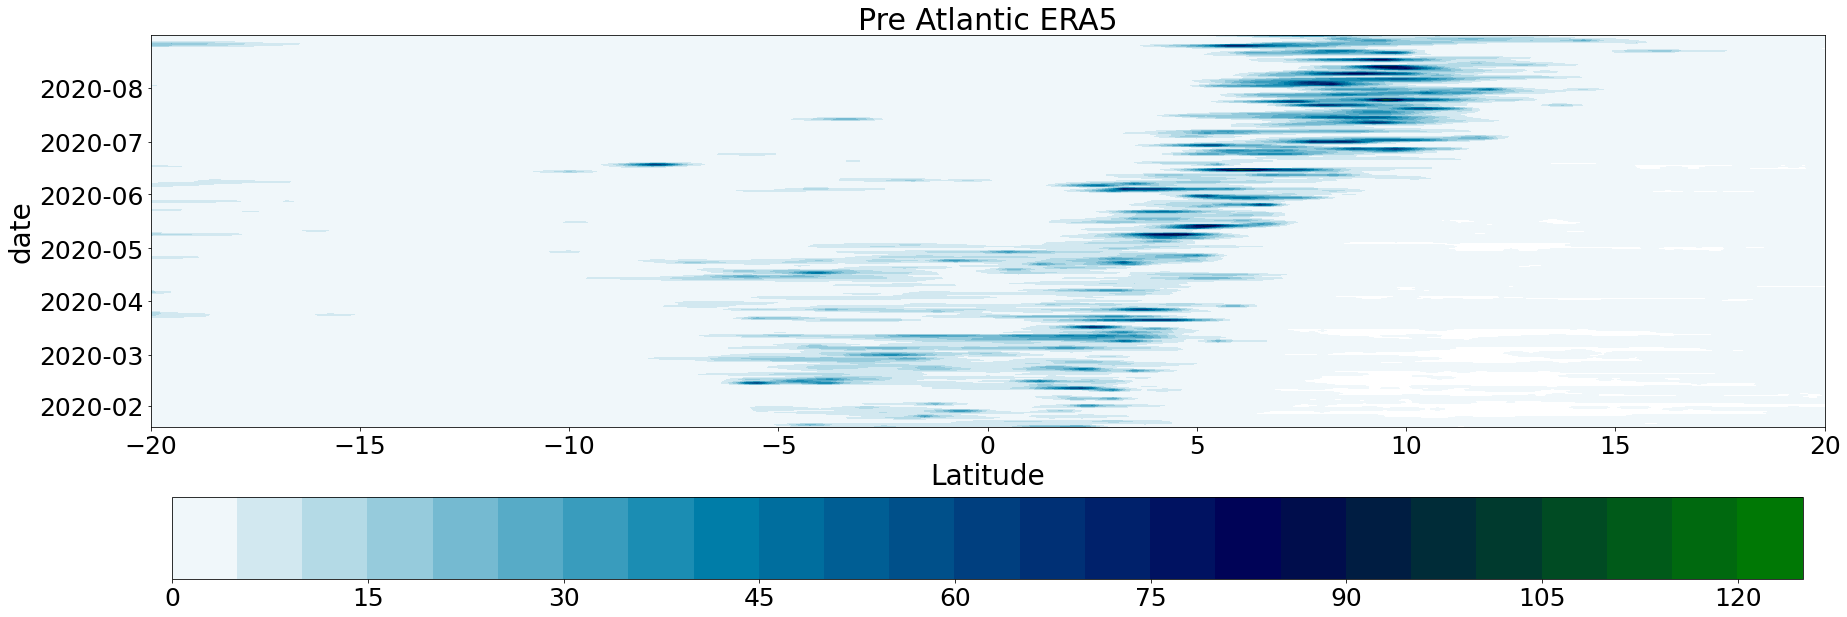

In [39]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot ERA5
###############
datain = iris.load_cube('/work/bb1153/b381639/ERA5/Prec_2020_tropical_ocean_atllat.nc')

#datain.data=datain.data-273.15

#datain.data=datain.data*-1
regyonx=datain[:,0,:,0]

ERA5=regyonx

#print(ERA5)



######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
print(arr)
arr_era=arr
latm=arr.lat.data              # latm is x-axis




time=arr.time.data 
#np.arange(0,225,1)
##################
#(2)set color bar and prepare fig size
levels1=np.arange(0,130,5) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
cbar='ocean_r'
#cbar='seismic'
#cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(latm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(latm,time,arr,cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('Pre Atlantic ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('Latitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('Pre_atl_ERA5.eps',format='eps',dpi=1000)

/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)


<xarray.DataArray 'pr' (time: 225, lat: 161)>
dask.array<filled, shape=(225, 161), dtype=float32, chunksize=(225, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 2.02e+07 2.02e+07 2.02e+07 ... 2.02e+07 2.02e+07
  * lat      (lat) float64 20.0 19.75 19.5 19.25 ... -19.25 -19.5 -19.75 -20.0
    lon      float64 ...
Attributes:
    long_name:                 precipitation flux
    units:                     mm/day
    invalid_standard_name:     pr
    CDI:                       Climate Data Interface version 1.9.6 (http://m...
    Conventions:               CF-1.6
    history:                   Wed Jan 26 15:57:13 2022: cdo zonmean -sellonl...
    source:                    git@gitlab.dkrz.de:icon/icon-aes.git@ca31bdb30...
    institution:               Max Planck Institute for Meteorology
    title:                     ICON simulation
    references:                see MPIM/DWD publications
    comment:                   Sapphire Dyamond (k203123) on m20958 (Linux

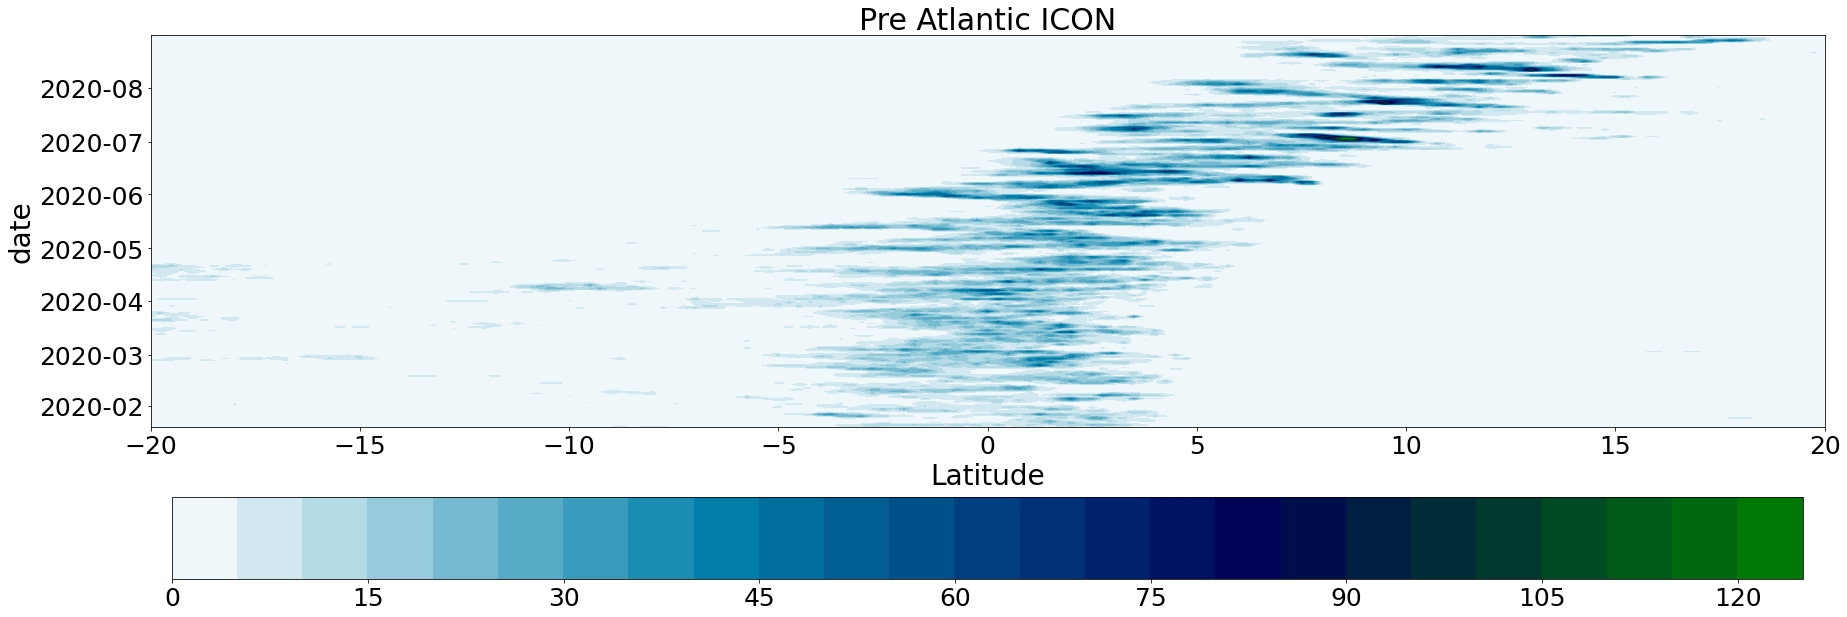

In [40]:
###############
# plot ICON
###############
datain = iris.load_cube('/work/bb1153/b381639/model/data_icon/Prec_2020_tropical_ocean_atllat.nc')

#datain.data=datain.data-273.15

#datain.data=datain.data*-1
regyonx=datain[:,:,0]

ICON=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ICON) # iris cube to xarray
arr_icon=arr
print(arr)
#latm=arr.latitude.data              # latm is x-axis
lonm=arr.lat.data             # lonm is y-axis  
#time=np.arange(0,225,1)
##################
#(2)set color bar and prepare fig size
levels1=np.arange(0,130,5) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
cbar='ocean_r'
#cbar='seismic'
#cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('Pre Atlantic ICON',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('Latitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('Pre_atl_ICON.eps',format='eps',dpi=1000)

In [42]:
SSTdiff=ICON.data-ERA5.data

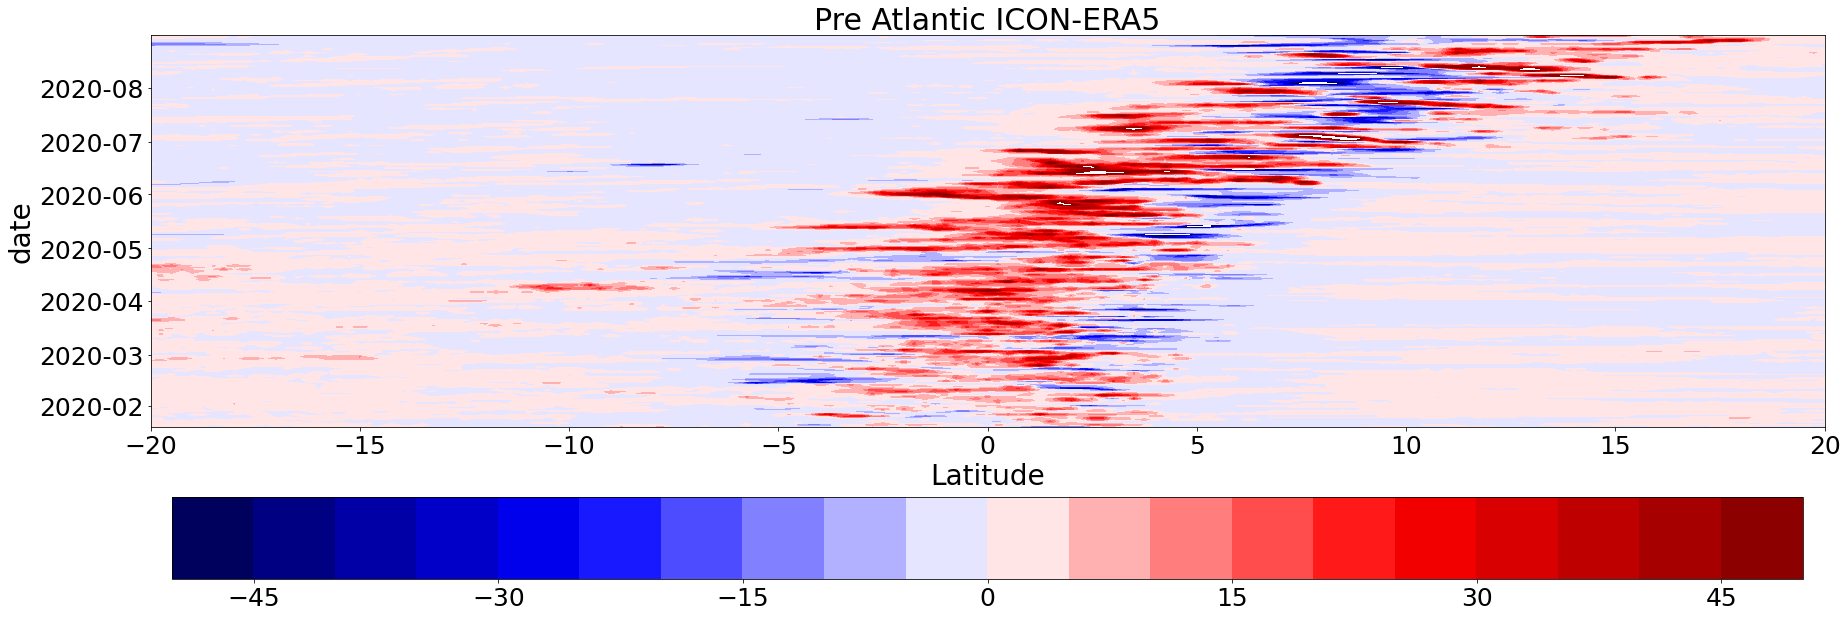

In [43]:
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=SSTdiff #ar.DataArray.from_iris(SSTdiff) # iris cube to xarray
#latm=arr.latitude.data              # latm is x-axis
#lonm=arr.longitude.data             # lonm is y-axis  

##################
#(2)set color bar and prepare fig size
levels1=np.arange(-50,55,5) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='jet'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,time,arr[:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('Pre Atlantic ICON-ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('Latitude'), fontsize=28)
plt.ylabel(('date'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('Pre_atl_ICON-ERA5.eps',format='eps',dpi=1000)